In [1]:
# wczytanie danych
import pandas as pd

df = pd.read_csv("wine.data").reset_index()
df.head()

,index,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
# wybór cech
cols = [
       'Alcohol',
       ' Malic acid',
       ' Ash',
       ' Alcalinity of ash',
       ' Magnesium',
       ' Total phenols',
       ' Flavanoids',
       ' Nonflavanoid phenols',
       ' Proanthocyanins',
       ' Color intensity',
       ' Hue',
       ' OD280/OD315 of diluted wines',
       ' Proline            ']

X = df[cols]
y = df['index']

In [3]:
# podział danych
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42,
    shuffle=True
)

In [4]:
# normalizacja
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

**Normalizację** danych stosujemy, aby poszczególne cechy miały porównywalną skalę, dzięki czemu model może je właściwie interpretować i nadawać im odpowiednie wagi.

**KNN** opiera się na odległościach między punktami i najczęściej korzysta z odległości euklidesowej. Gdyby dane nie były zeskalowane odpowiednio to niektóre z tych odległości byłyby na tyle zaburzone, że mogłoby to spowodować złe predykcje modelu.

**RFC** opiera się na drzewach decyzyjnych, a jak wiadomo drzewa decyzyjne nie potrzebują normalizacji, aby poprawnie predykować wyniki."""

KNN accuracy: 0.9444444444444444
KNN precision: [1.  1.  0.8]
KNN recall: [1.         0.85714286 1.        ]
KNN F-measures: [1.         0.92307692 0.88888889]


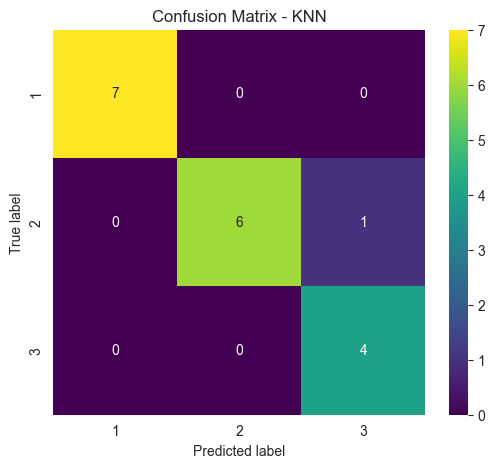

In [5]:
# trening dla KNeighborsClasifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
pre_knn = precision_score(y_test, y_pred_knn, average=None)
rec_knn = recall_score(y_test, y_pred_knn, average=None)
f1s_knn = f1_score(y_test, y_pred_knn, average=None)
con_mat_knn = confusion_matrix(y_test, y_pred_knn)

print(f"KNN accuracy: {acc_knn}")
print(f"KNN precision: {pre_knn}")
print(f"KNN recall: {rec_knn}")
print(f"KNN F-measures: {f1s_knn}")

plt.figure(figsize=(6,5))
sns.heatmap(
    con_mat_knn,
    annot=True,
    fmt="d",
    cmap="viridis",
    cbar=True,
    xticklabels=knn.classes_,  # etykiety klas na osi X
    yticklabels=knn.classes_   # etykiety klas na osi Y
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - KNN")
plt.show()


RFC accuracy: 0.9444444444444444
RFC precision: [1.  1.  0.8]
RFC recall: [1.         0.85714286 1.        ]
RFC F-measures: [1.         0.92307692 0.88888889]


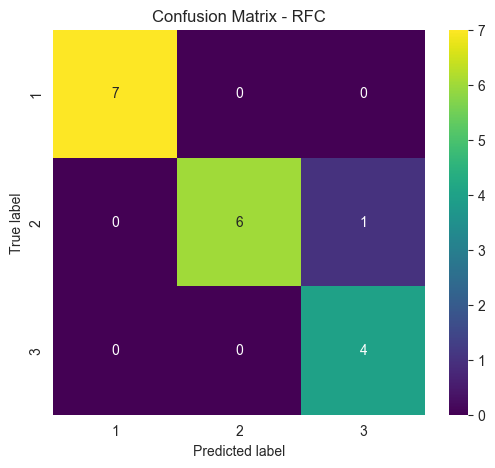

In [10]:
# trening dla RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_scaled, y_train)

y_pred_rfc = rfc.predict(X_test_scaled)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
pre_rfc = precision_score(y_test, y_pred_rfc, average=None)
rec_rfc = recall_score(y_test, y_pred_rfc, average=None)
f1s_rfc = f1_score(y_test, y_pred_rfc, average=None)
con_mat_rfc = confusion_matrix(y_test, y_pred_rfc)

print(f"RFC accuracy: {acc_rfc}")
print(f"RFC precision: {pre_rfc}")
print(f"RFC recall: {rec_rfc}")
print(f"RFC F-measures: {f1s_rfc}")

plt.figure(figsize=(6,5))
sns.heatmap(
    con_mat_rfc,
    annot=True,
    fmt="d",
    cmap="viridis",
    cbar=True,
    xticklabels=knn.classes_,  # etykiety klas na osi X
    yticklabels=knn.classes_   # etykiety klas na osi Y
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - RFC")
plt.show()

**Accuracy:** Jest to liczba dobrze sklasyfikowanych próbek do wszystkich próbek. Jest to dobra metryka dla zbiorów dobrze zbalansowanych i gdy chcemy ogólnej oceny modelu.

**Precision:** Stosunek *[ tp / ( tp + fp ) ]*, gdzie tp - liczba wyników prawdziwie dodatkich, a fp - liczba wyników fałszywie dodatnich. Jest to intuicyjna zdolność klasyfikatora do nieoznaczania jako dodatniej próbki tej która jest ujemna. Sprawdza ile spośród wszystkich oznaczonych jako pozytywne wyników jest faktycznie pozytywnych.

**Recall:** Stosunek *[ tp / ( tp + fn ) ]*, gdzie tp - liczba wyników prawdziwie dodatnich, a fn to liczba wyników fałszywie negatywnych. Ta metryka służy do znalezienia wszystkich pozytywnych przypadków.

**F-measures:** Stosunek *[ 2 * tp / ( 2 * ( tp + fp + fn ) ) ]*. Metrykę tę można interpretować jako średnią harmniczną z 'Precision' oraz 'Recall', gdzie F1-score osiąga najlepszą ocenę przy wyniku 1, a najgorszą przy wyniku 0. F1-score jest szczególnie użyteczny w problemach z nierównomiernym rozkładem klas, gdzie ani sama precyzja, ani recall nie dają pełnego obrazu skuteczności modelu.

**Confusion Matrix:** Służy do szacowania poprawności klasyfikacji. Mierzy liczbę prawidłowych i błędnych predykcji w rozbiciu na klasy: *TP, TN, FP, FN*. Można dzięki niej zobaczyć gdzie model popełnia błędy.

**Classification report:** Buduje raport tekstowy pokazujący główne metryki klasyfikacyjne. Dzięki niemu będziemy mieć kompleksowy raport z głównymi metrykami w jednym miejscu.

Różnice w metrykach między KNN a RFC wynikają głównie z algorytmicznej wrażliwości na skalę danych, szum i strukturę przestrzeni cech. KNN jest „lokalnym” klasyfikatorem bazującym na odległościach, natomiast RFC agreguje decyzje wielu drzew, co czyni go bardziej odpornym i stabilnym w złożonych przypadkach.